In [37]:
print("Hello Bond Analysis!")

Hello Bond Analysis!


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import seaborn as sns
import scikit_posthocs as sp
import matplotlib.dates as mdates

In [39]:
df = pd.read_csv("bond_trading.csv")

In [40]:
df = pd.read_csv("bond_trading.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df = df[df["TransType"] != 's']
df = df.rename(columns={"SYS_DESCR": "trading_platform",
                        "TradeDate": "trade_date",
                        "Security": "security",
                        "TransType": "transaction_type",
                        "Quantity": "quantity",
                        "Maturity": "maturity",
                        "Region": "region",
                        "Flow": "flow",
                        "Counterparty": "counterparty",
                        "MaturityBucket": "maturity_bucket",
                        "YearQuarter": "year_quarter",
                        "Outstanding": "outstanding",
                        "Year": "year",
                        "YearMonth": "year_month",})

# Convert columns to datetime
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y%m')
df['trade_date'] = pd.to_datetime(df['trade_date'])

# Extract Quarter column
df['quarter'] = df['year_quarter'].str.extract(r'(Q\d)')

# Extract the year from the Date column
df["year"] = df["trade_date"].dt.year

In [41]:
df

,trade_date,security,transaction_type,quantity,trading_platform,maturity,region,flow,counterparty,maturity_bucket,year_month,year_quarter,outstanding,quarter,year
0,2015-01-23,EU000A1G0DD4,B,10000000.0,Non Electronic,2.74,Asia,-10000000.0,CB&OtherPublic,<3Yr,2015-01-01,2015-Q1,3000.00,Q1,2015
1,2014-09-26,EU000A1Z99M6,B,20000000.0,Non Electronic,0.80,Asia,-20000000.0,CB&OtherPublic,<3Yr,2014-09-01,2014-Q3,4000.00,Q3,2014
2,2014-09-25,EU000A1G0AB4,B,10000000.0,Bloomberg,0.36,Asia,-10000000.0,CB&OtherPublic,<3Yr,2014-09-01,2014-Q3,3000.00,Q3,2014
3,2019-08-22,EU000A1G0AB4,B,40000000.0,Non Electronic,1.41,Asia,-40000000.0,CB&OtherPublic,<3Yr,2019-08-01,2019-Q3,4997.15,Q3,2019
4,2019-09-20,EU000A1G0DG7,B,30000000.0,Non Electronic,1.33,Asia,-30000000.0,CB&OtherPublic,<3Yr,2019-09-01,2019-Q3,4997.15,Q3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247121,2019-12-30,EU000A1U9910,B,1600000.0,Other Electronic,0.83,Middle East & Africa,-1600000.0,Pens.Fund/Insur.,<3Yr,2019-12-01,2019-Q4,6000.00,Q4,2019
247122,2020-04-16,EU000A1G0BH9,B,1000000.0,Tradeweb,5.78,Middle East & Africa,-1000000.0,CB&OtherPublic,3Yr-7Yr,2020-04-01,2020-Q2,5000.00,Q2,2020
247123,2020-04-21,EU000A1G0BG1,B,5900000.0,Tradeweb,5.77,Middle East & Africa,-5900000.0,CB&OtherPublic,3Yr-7Yr,2020-04-01,2020-Q2,5000.00,Q2,2020
247124,2020-03-10,EU000A1G0DR4,B,17000000.0,Tradeweb,5.34,Middle East & Africa,-17000000.0,CB&OtherPublic,3Yr-7Yr,2020-03-01,2020-Q1,3495.55,Q1,2020


# Normality & Distribution

C:\Users\yoavs\AppData\Local\Temp\ipykernel_12920\330463803.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["quantity"], kde=True, fit=stats.norm, color='purple')


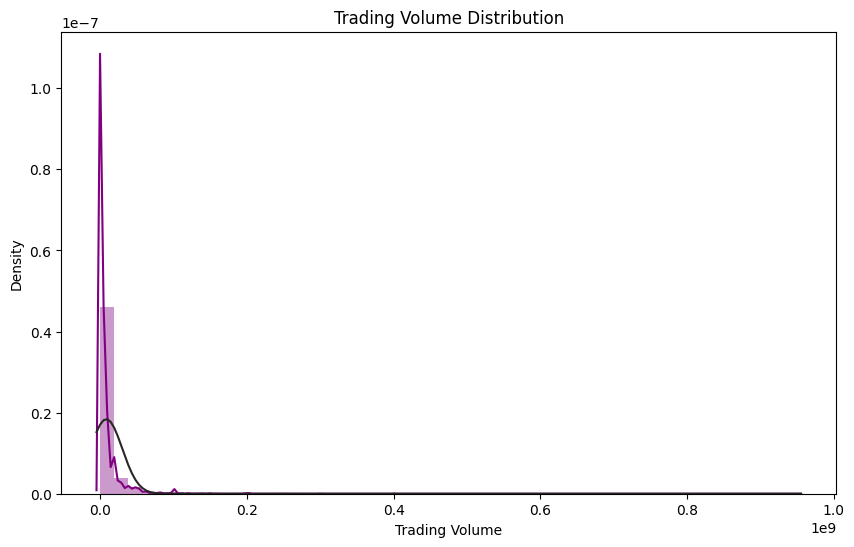

In [42]:
# plot normal distribution of trading volume
plt.figure(figsize=(10, 6))
sns.distplot(df["quantity"], kde=True, fit=stats.norm, color='purple')
plt.xlabel("Trading Volume")
plt.title('Trading Volume Distribution')
plt.show()

C:\Users\yoavs\AppData\Local\Temp\ipykernel_12920\933451040.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["quantity"].apply(math.log), kde=True, fit=stats.norm)


<Axes: xlabel='quantity', ylabel='Density'>

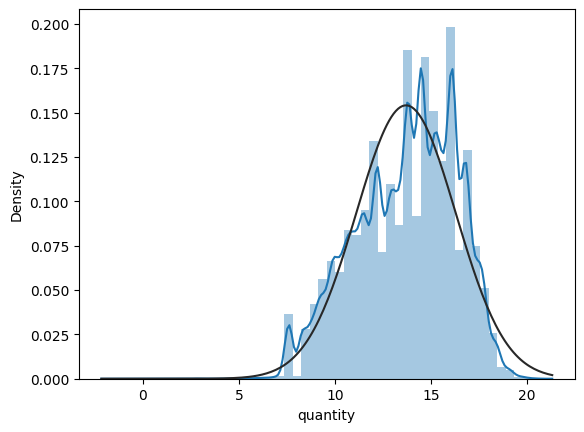

In [43]:
sns.distplot(df["quantity"].apply(math.log), kde=True, fit=stats.norm)

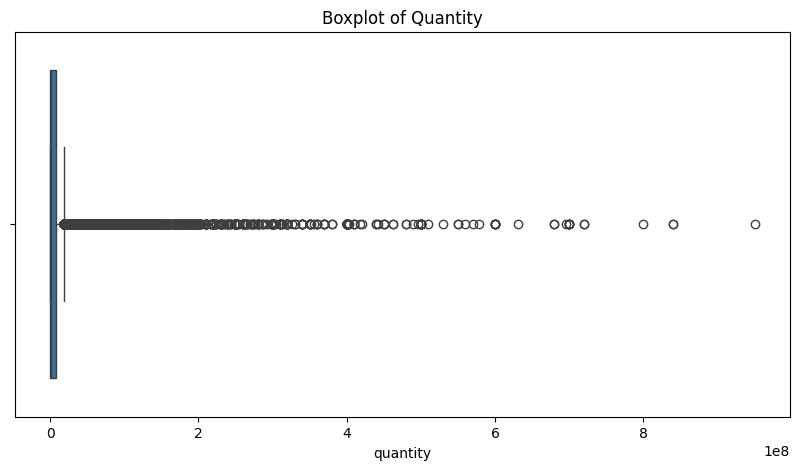

In [53]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['quantity'])
plt.title("Boxplot of Quantity")
plt.show()


In [65]:
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['quantity'] < (Q1 - 1.5 * IQR)) | (df['quantity'] > (Q3 + 1.5 * IQR))]
outliers_percentage = (len(outliers) / len(df)) * 100
print(f"{outliers_percentage:.1f}% of the data are outliers")

12.7% of the data are outliers


nope.

# Quarter Analysis

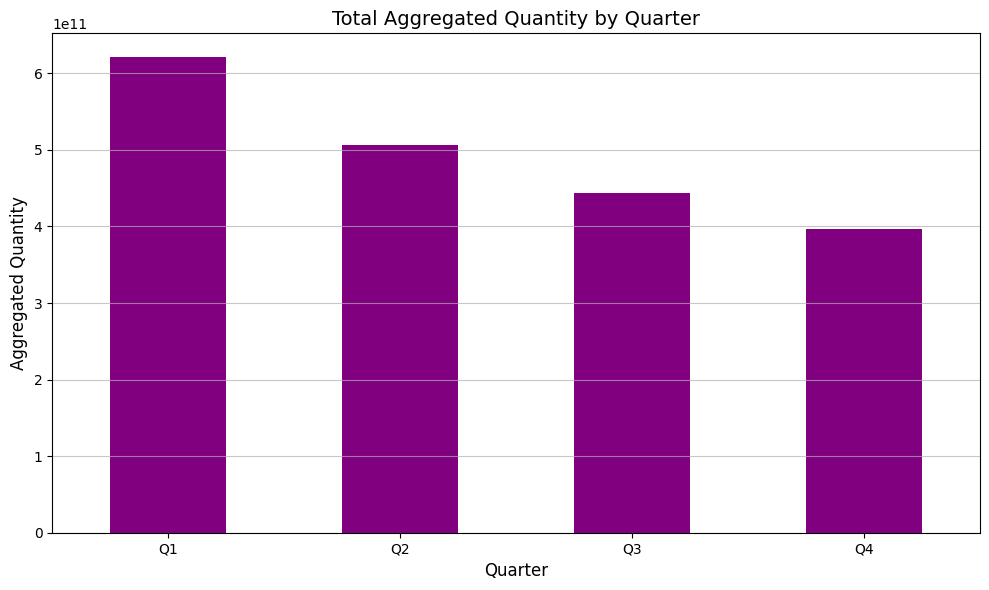

In [44]:
aggregated_df_sum = df.groupby('quarter')['quantity'].sum().reset_index()

aggregated_df_sum.set_index('quarter').plot(kind='bar', legend=False, color="purple", figsize=(10, 6))
plt.title('Total Aggregated Quantity by Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Aggregated Quantity', fontsize=12)
plt.tick_params(axis='x', rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

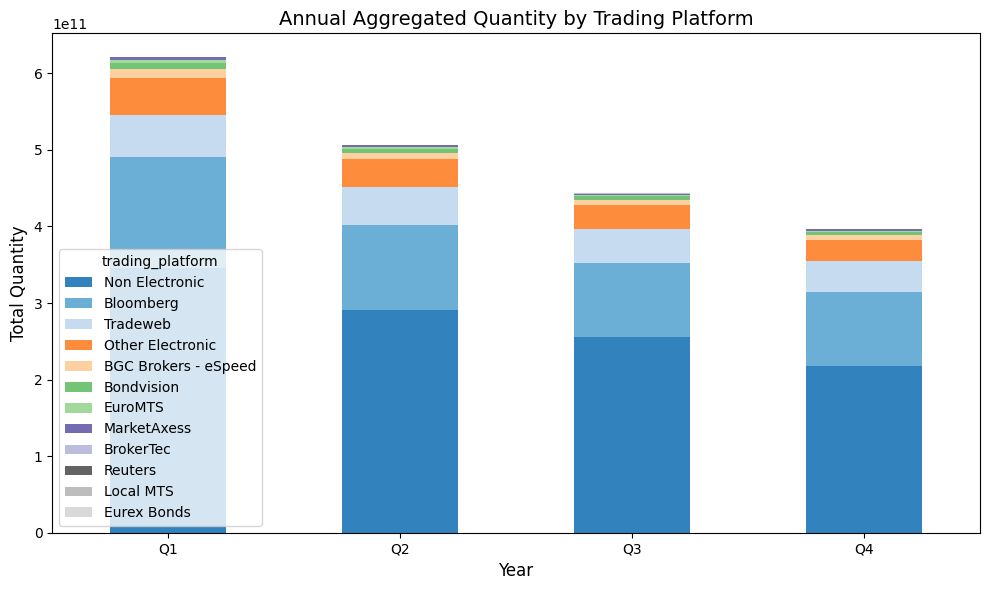

In [47]:
# Aggregate the data by year and trading platform
agg_data = df.groupby(['quarter', 'trading_platform'])['quantity'].sum().unstack()

agg_data = agg_data[agg_data.sum(axis=0).sort_values(ascending=False).index]

# Plot a stacked barplot
agg_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

# Add labels and title
plt.title('Annual Aggregated Quantity by Trading Platform', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


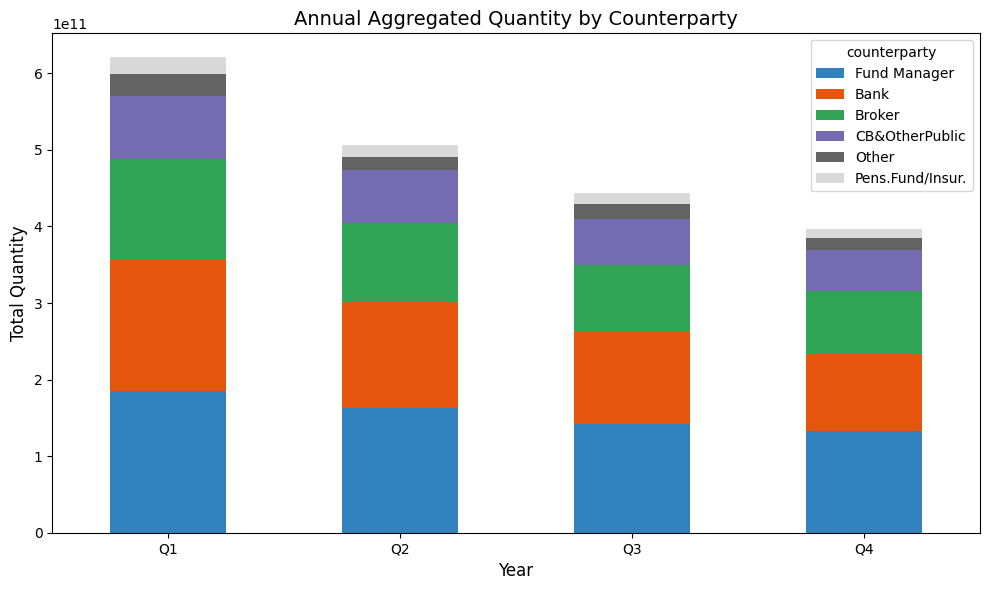

In [48]:
# Aggregate the data by year and trading platform
agg_data = df.groupby(['quarter', 'counterparty'])['quantity'].sum().unstack()

agg_data = agg_data[agg_data.sum(axis=0).sort_values(ascending=False).index]

# Plot a stacked barplot
agg_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

# Add labels and title
plt.title('Annual Aggregated Quantity by Counterparty', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


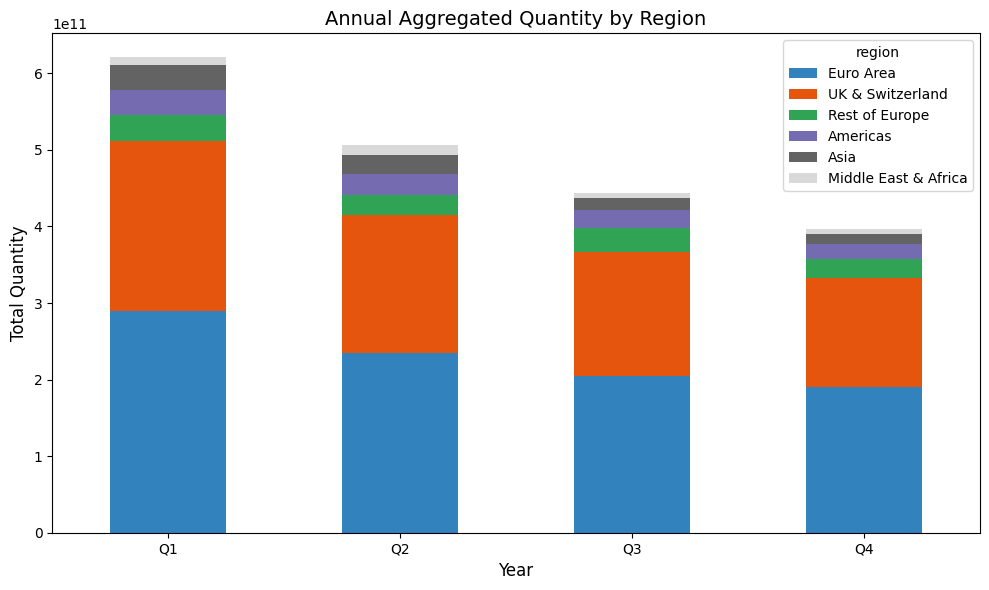

In [49]:
# Aggregate the data by year and trading platform
agg_data = df.groupby(['quarter', 'region'])['quantity'].sum().unstack()

agg_data = agg_data[agg_data.sum(axis=0).sort_values(ascending=False).index]

# Plot a stacked barplot
agg_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

# Add labels and title
plt.title('Annual Aggregated Quantity by Region', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


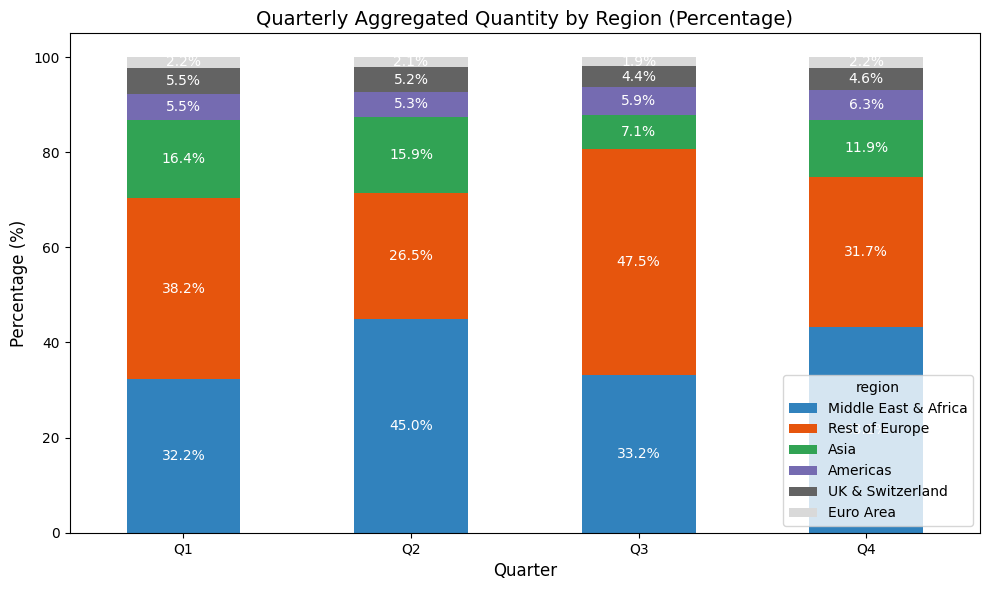

In [50]:
# Aggregate the data by quarter and region
agg_data = df.groupby(['quarter', 'region'])['quantity'].median().unstack()

# Sort counterparties by total quantity
agg_data = agg_data[agg_data.sum(axis=0).sort_values(ascending=False).index]

# Convert to percentage (relative to total per quarter)
agg_data_pct = agg_data.div(agg_data.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart with percentages
ax = agg_data_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

# Add labels and title
plt.title('Quarterly Aggregated Quantity by Region (Percentage)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)

# Add percentage labels on bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Only label non-zero bars
        ax.annotate(f'{height:.1f}%', 
                    (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    ha='center', va='center', fontsize=10, color='white')

# Show the plot
plt.tight_layout()
plt.show()


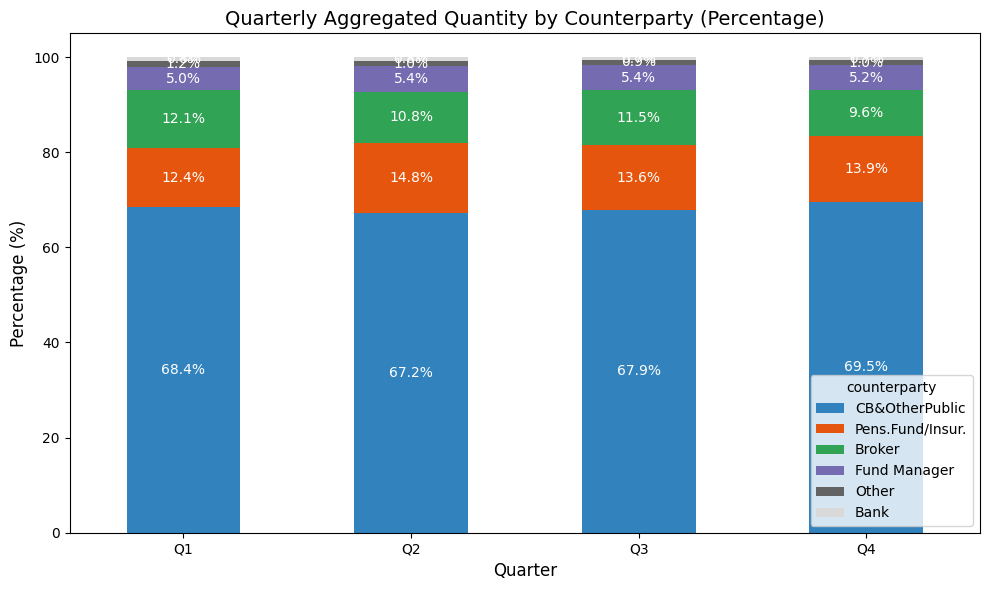

In [51]:
# Aggregate the data by quarter and counterparty
agg_data = df.groupby(['quarter', 'counterparty'])['quantity'].median().unstack()

# Sort counterparties by total quantity
agg_data = agg_data[agg_data.sum(axis=0).sort_values(ascending=False).index]

# Convert to percentage (relative to total per quarter)
agg_data_pct = agg_data.div(agg_data.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart with percentages
ax = agg_data_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

# Add labels and title
plt.title('Quarterly Aggregated Quantity by Counterparty (Percentage)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)

# Add percentage labels on bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Only label non-zero bars
        ax.annotate(f'{height:.1f}%', 
                    (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    ha='center', va='center', fontsize=10, color='white')

# Show the plot
plt.tight_layout()
plt.show()

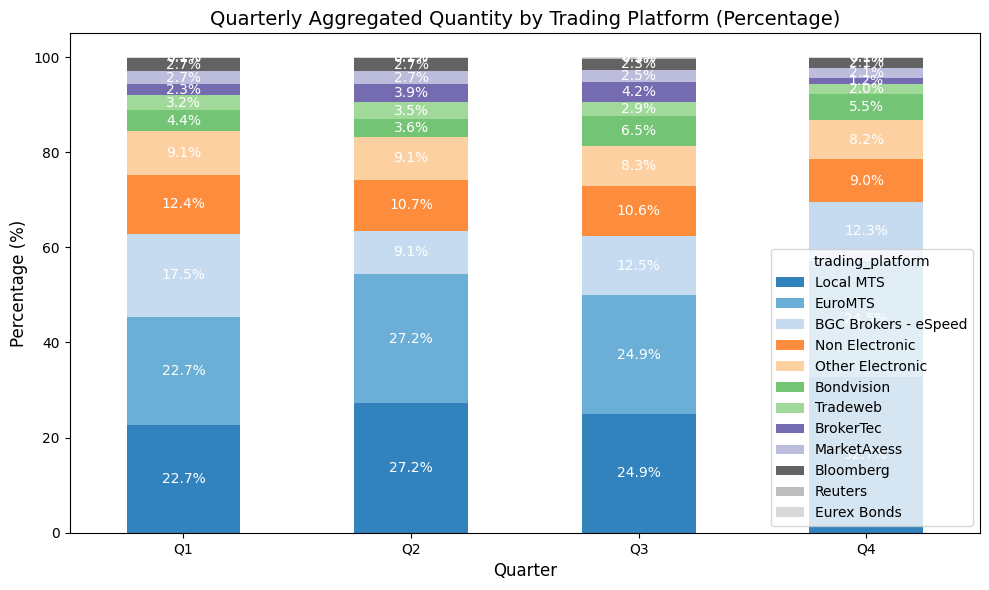

In [52]:
# Aggregate the data by quarter and trading_platform
agg_data = df.groupby(['quarter', 'trading_platform'])['quantity'].median().unstack()

# Sort counterparties by total quantity
agg_data = agg_data[agg_data.sum(axis=0).sort_values(ascending=False).index]

# Convert to percentage (relative to total per quarter)
agg_data_pct = agg_data.div(agg_data.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart with percentages
ax = agg_data_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

# Add labels and title
plt.title('Quarterly Aggregated Quantity by Trading Platform (Percentage)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)

# Add percentage labels on bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Only label non-zero bars
        ax.annotate(f'{height:.1f}%', 
                    (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    ha='center', va='center', fontsize=10, color='white')

# Show the plot
plt.tight_layout()
plt.show()


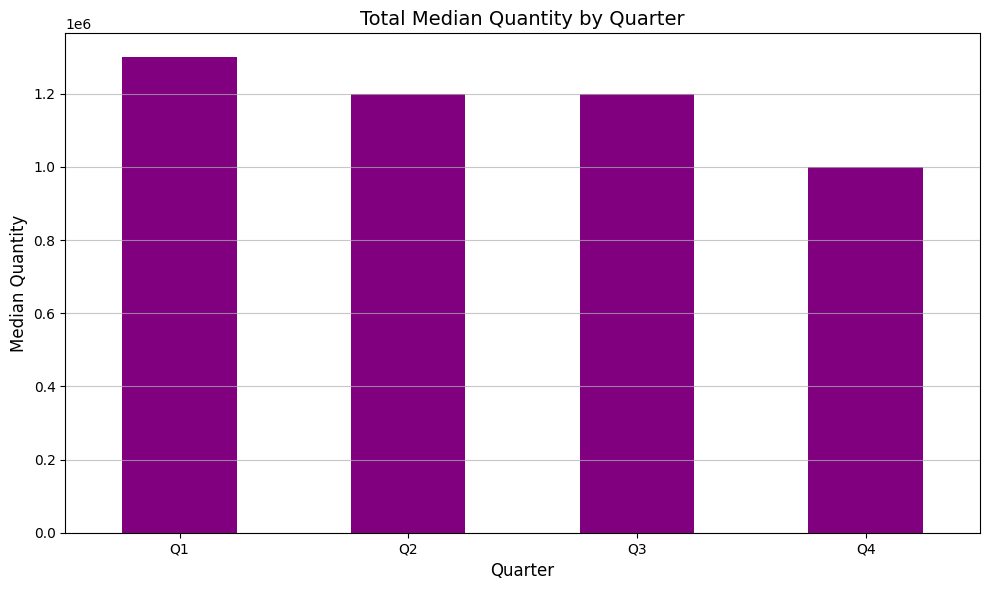

In [66]:
aggregated_df_median = df.groupby('quarter')['quantity'].median().reset_index()

aggregated_df_median.set_index('quarter').plot(kind='bar', legend=False, color="purple", figsize=(10, 6))
plt.title('Total Median Quantity by Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Median Quantity', fontsize=12)
plt.tick_params(axis='x', rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

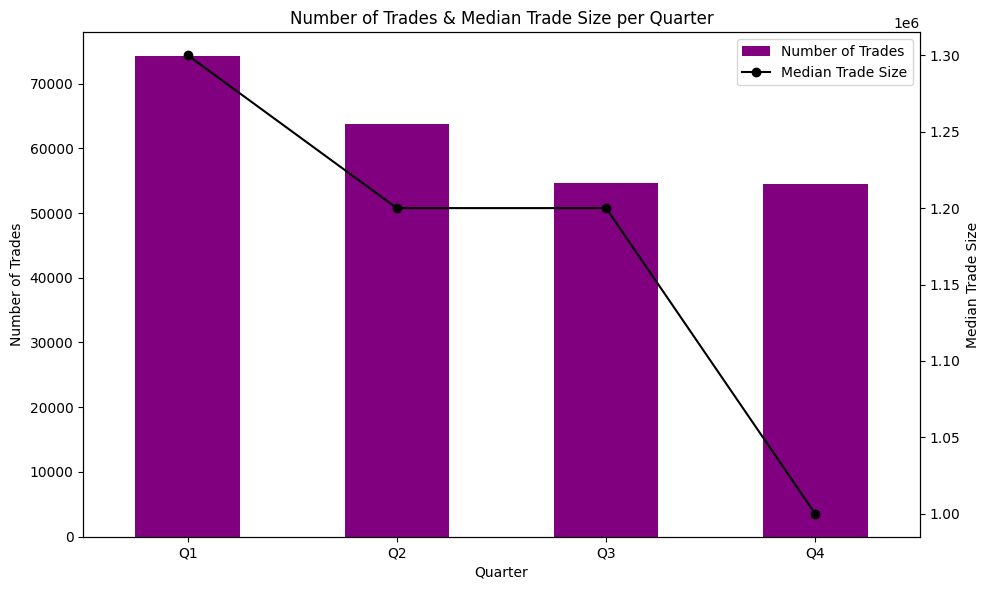

In [68]:
# Aggregate data
trades_per_quarter = df.groupby('quarter')['quantity'].count()
average_trade_size = df.groupby('quarter')['quantity'].median()

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for number of trades
trades_per_quarter.plot(kind='bar', ax=ax1, color="purple", label="Number of Trades")
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Number of Trades')
ax1.tick_params(axis='y')

# Ensure x-axis labels are not rotated
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)  # Fix rotation

# Create a second y-axis for average trade size
ax2 = ax1.twinx()  # Creates a second axes sharing the same x-axis
average_trade_size.plot(kind='line', ax=ax2, color="black", marker='o', label="Median Trade Size")
ax2.set_ylabel('Median Trade Size')
ax2.tick_params(axis='y')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best")  # Combine the legends

plt.title('Number of Trades & Median Trade Size per Quarter')
plt.tight_layout()
plt.show()


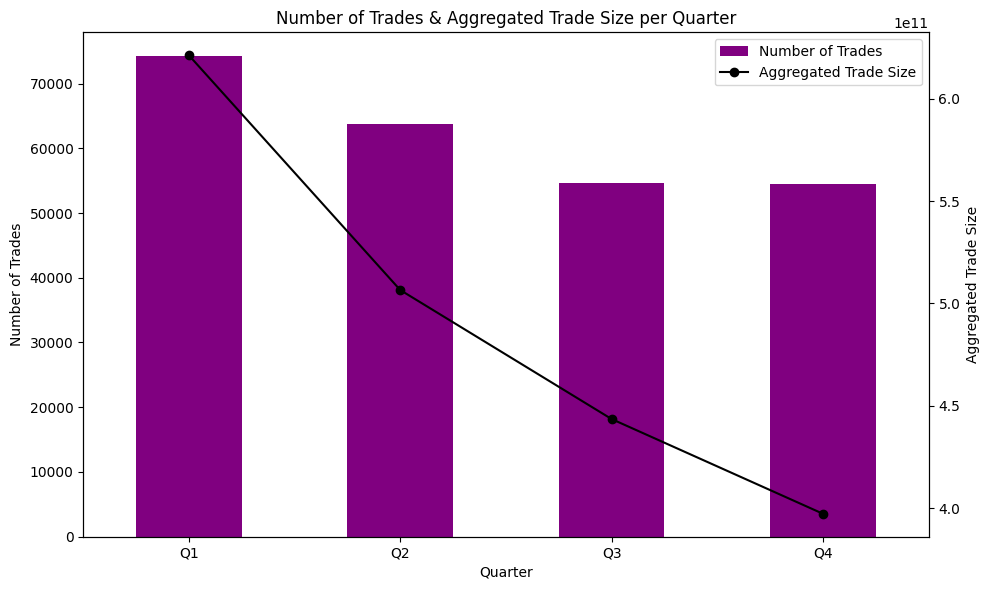

In [69]:
# Aggregate data
trades_per_quarter = df.groupby('quarter')['quantity'].count()
average_trade_size = df.groupby('quarter')['quantity'].sum()

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for number of trades
trades_per_quarter.plot(kind='bar', ax=ax1, color="purple", label="Number of Trades")
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Number of Trades')
ax1.tick_params(axis='y')

# Ensure x-axis labels are not rotated
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)  # Fix rotation

# Create a second y-axis for average trade size
ax2 = ax1.twinx()  # Creates a second axes sharing the same x-axis
average_trade_size.plot(kind='line', ax=ax2, color="black", marker='o', label="Aggregated Trade Size")
ax2.set_ylabel('Aggregated Trade Size')
ax2.tick_params(axis='y')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best")  # Combine the legends

plt.title('Number of Trades & Aggregated Trade Size per Quarter')
plt.tight_layout()
plt.show()


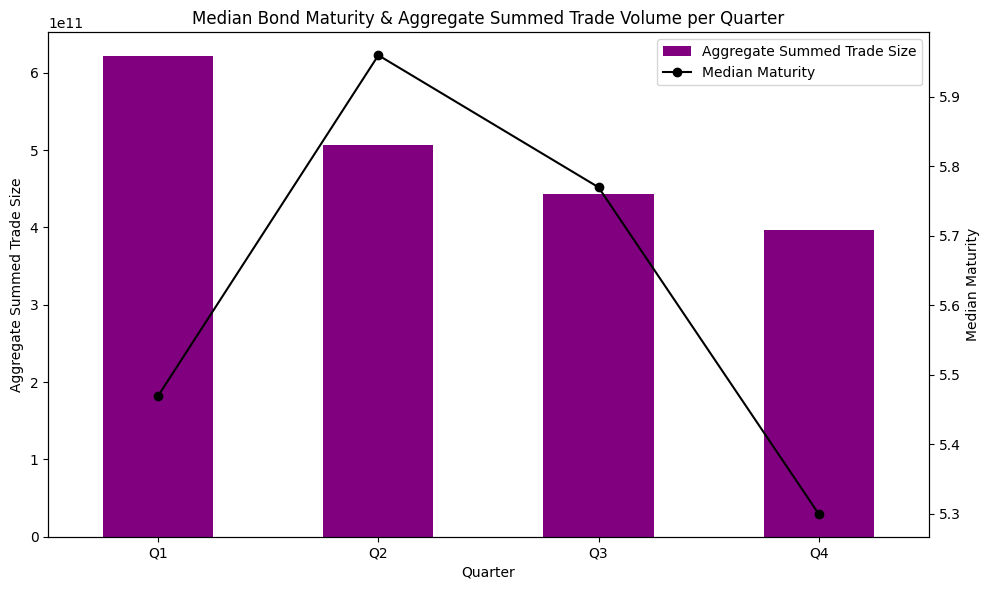

In [70]:
# Aggregate data
trades_per_quarter = df.groupby('quarter')['quantity'].sum()
agg_maturity = df.groupby('quarter')['maturity'].median()

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Aggregate Summed Trade Size
trades_per_quarter.plot(kind='bar', ax=ax1, color="purple", label="Aggregate Summed Trade Size")
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Aggregate Summed Trade Size')
ax1.tick_params(axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)  # Fix rotation

# Create a second y-axis for agg maturity
ax2 = ax1.twinx()  # Important: creates a second axes sharing the same x-axis
agg_maturity.plot(kind='line', ax=ax2, color="black", marker='o', label="Median Maturity")
ax2.set_ylabel('Median Maturity', )
ax2.tick_params(axis='y')


# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best") #combine the legends

plt.title('Median Bond Maturity & Aggregate Summed Trade Volume per Quarter')
plt.tight_layout()
plt.show()


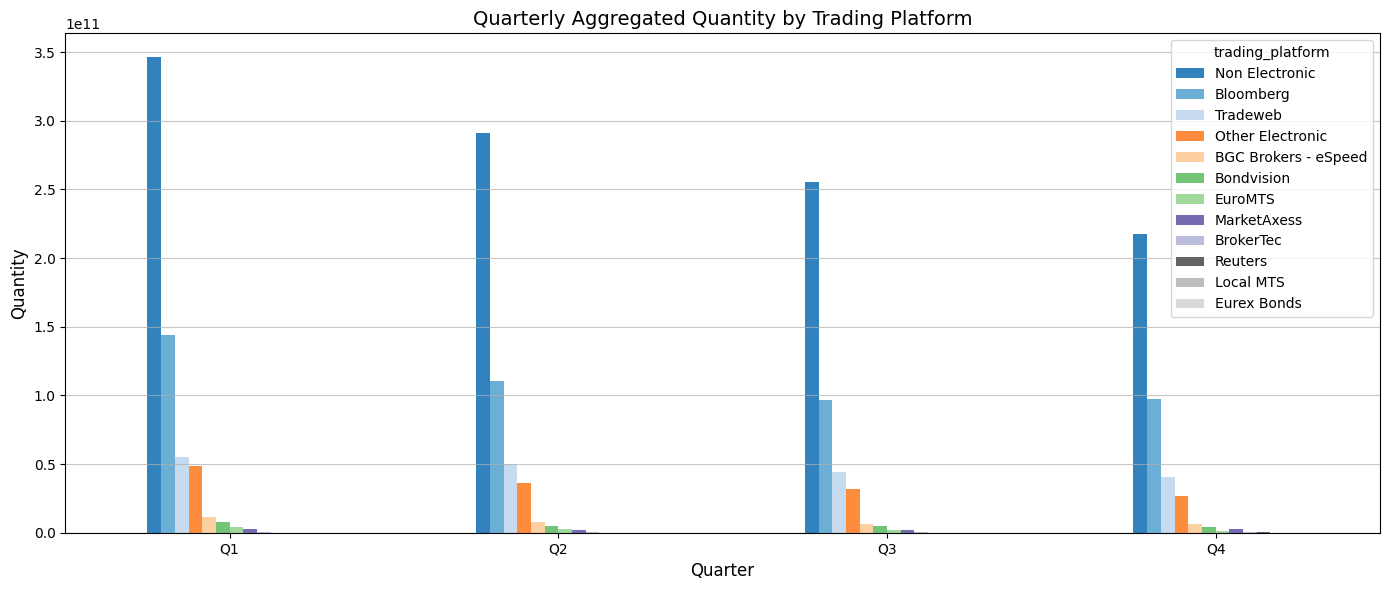

In [71]:
# Aggregate the data by year and trading platform
agg_data = df.groupby(['quarter', 'trading_platform'])['quantity'].sum().unstack()

agg_data = agg_data[agg_data.median(axis=0).sort_values(ascending=False).index]

# Plot a stacked barplot
agg_data.plot(kind='bar', figsize=(14, 6), colormap='tab20c')

# Add labels and title
plt.title('Quarterly Aggregated Quantity by Trading Platform', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='-', alpha=0.7)
# Show the plot
plt.tight_layout()
plt.show()


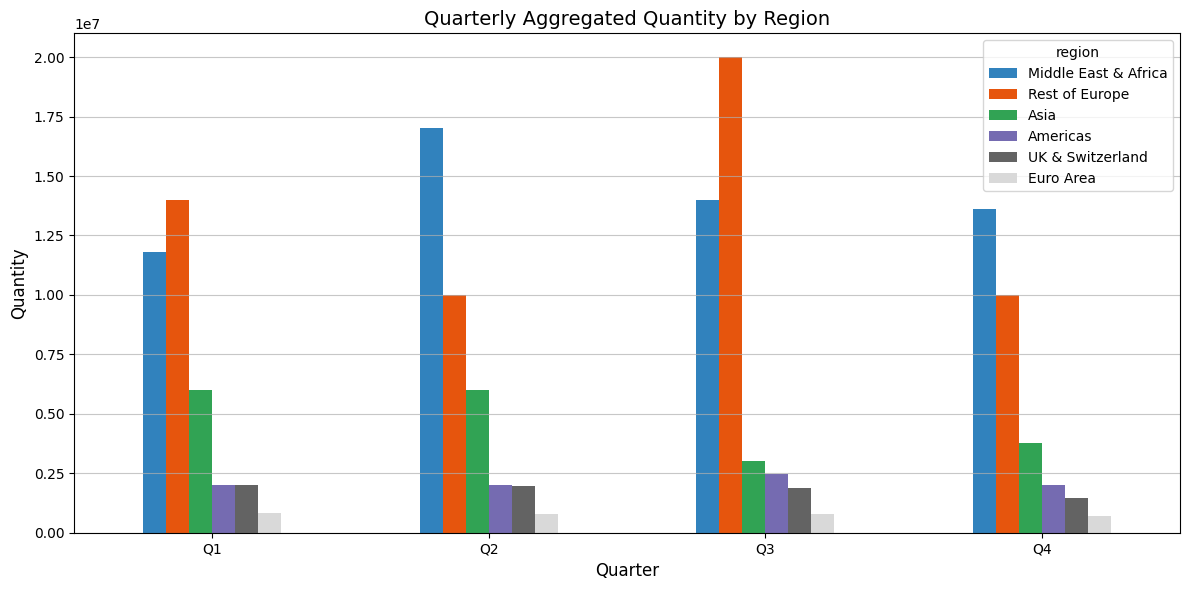

In [72]:
# Aggregate the data by year and trading platform
agg_data = df.groupby(['quarter', 'region'])['quantity'].median().unstack()

agg_data = agg_data[agg_data.median(axis=0).sort_values(ascending=False).index]

# Plot a stacked barplot
agg_data.plot(kind='bar', figsize=(12, 6), colormap='tab20c')

# Add labels and title
plt.title('Quarterly Aggregated Quantity by Region', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)
# Show the plot
plt.tight_layout()
plt.show()

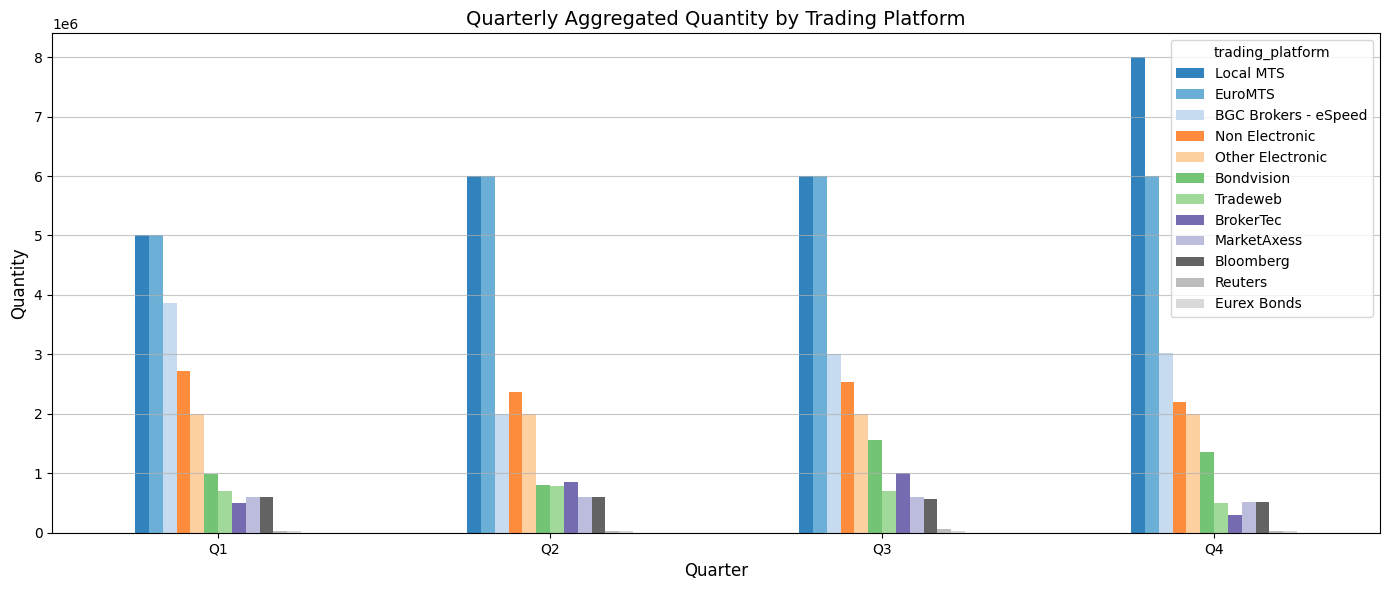

In [73]:
# Aggregate the data by year and trading platform
agg_data = df.groupby(['quarter', 'trading_platform'])['quantity'].median().unstack()

agg_data = agg_data[agg_data.median(axis=0).sort_values(ascending=False).index]

# Plot a stacked barplot
agg_data.plot(kind='bar', figsize=(14, 6), colormap='tab20c')

# Add labels and title
plt.title('Quarterly Aggregated Quantity by Trading Platform', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='-', alpha=0.7)
# Show the plot
plt.tight_layout()
plt.show()


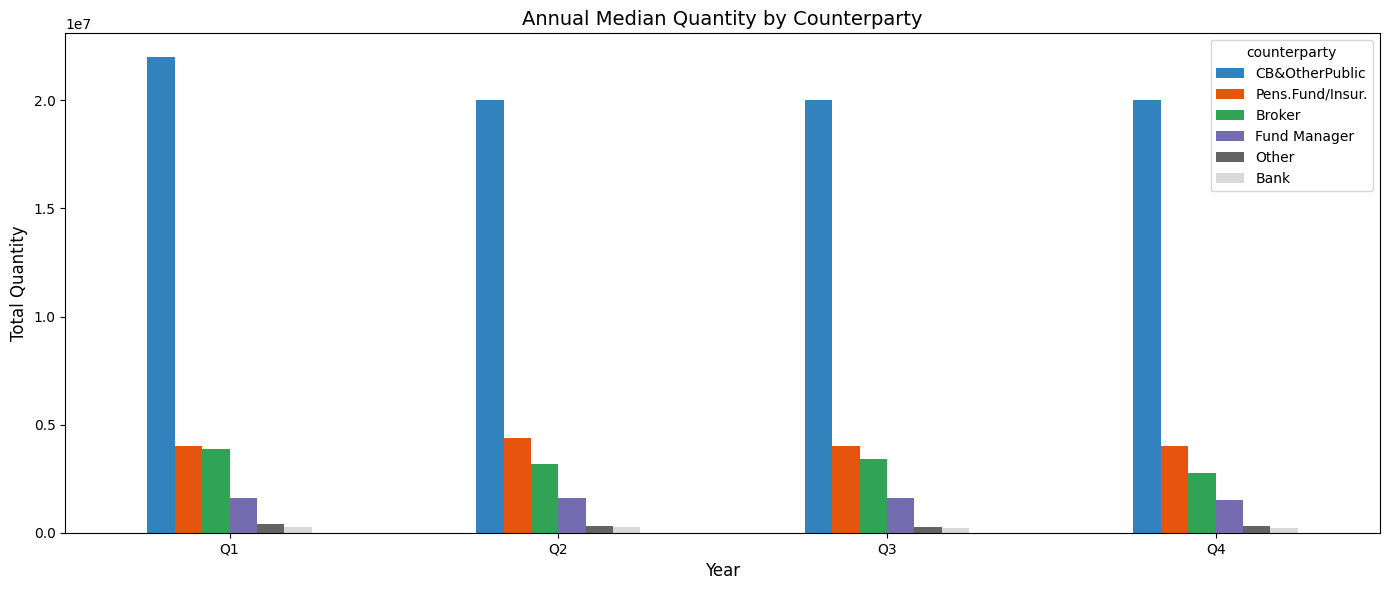

In [74]:
# Aggregate the data by year and trading platform
agg_data = df.groupby(['quarter', 'counterparty'])['quantity'].median().unstack()

agg_data = agg_data[agg_data.median(axis=0).sort_values(ascending=False).index]

# Plot a stacked barplot
agg_data.plot(kind='bar', figsize=(14, 6), colormap='tab20c')

# Add labels and title
plt.title('Annual Median Quantity by Counterparty', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [75]:
# Extract trade quantities for each quarter
q1 = df[df["quarter"] == "Q1"]["quantity"]
q2 = df[df["quarter"] == "Q2"]["quantity"]
q3 = df[df["quarter"] == "Q3"]["quantity"]
q4 = df[df["quarter"] == "Q4"]["quantity"]

# Perform the Kruskal-Wallis test
stat, p_value = stats.kruskal(q1, q2, q3, q4)

# Print results
print(f"Kruskal-Wallis H-statistic: {stat:.4f}")
print(f"P-value: {p_value:.50f}")

Kruskal-Wallis H-statistic: 115.7255
P-value: 0.00000000000000000000000064250805395993404569573070


In [76]:
# p-value < 0.05, we reject the null hypothesis → At least one quarter is significantly different.

# Perform Dunn’s test
posthoc_results = sp.posthoc_dunn(df, val_col="quantity", group_col="quarter", p_adjust="bonferroni")

# Set decimal formatting (up to 6 decimal places)
formatted_results = posthoc_results.applymap(lambda x: f"{x:.6f}")

# Display formatted results
print(formatted_results)

          Q1        Q2        Q3        Q4
Q1  1.000000  0.084523  0.042808  0.000000
Q2  0.084523  1.000000  1.000000  0.000000
Q3  0.042808  1.000000  1.000000  0.000000
Q4  0.000000  0.000000  0.000000  1.000000


C:\Users\yoavs\AppData\Local\Temp\ipykernel_12920\496801643.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_results = posthoc_results.applymap(lambda x: f"{x:.6f}")


Q1 is significantly different from Q3 and Q4, but not Q2.

Q2 and Q3 are NOT significantly different.

Q4 is significantly different from all other quarters.

Q1 likely has the highest trade quantities if we assume it was the largest group in the Kruskal-Wallis test.

# Monthly

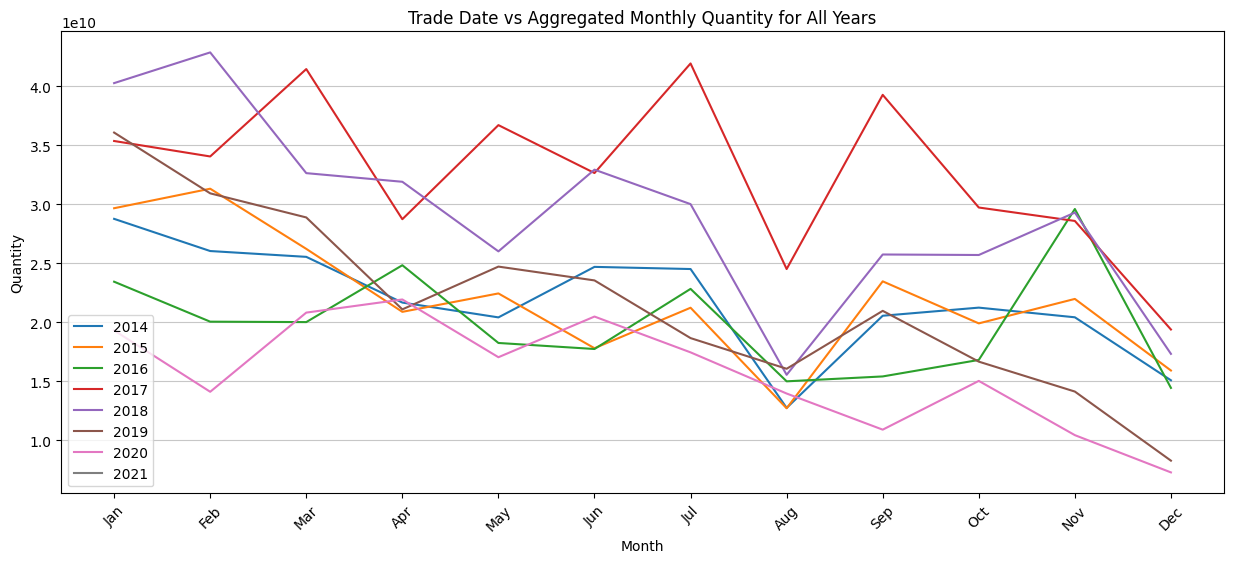

In [77]:
monthly_trades_df = df.sort_values(by='year_month', ascending=False).groupby("year_month")["quantity"].sum().reset_index()

monthly_trades_df["year"] = pd.to_datetime(monthly_trades_df["year_month"]).dt.year
monthly_trades_df["month"] = pd.to_datetime(monthly_trades_df["year_month"]).dt.strftime('%b')

# Get unique years
unique_years = monthly_trades_df["year"].unique()

# Define a more distinct color palette
colors = sns.color_palette("tab10", len(unique_years))

# Create a single plot
plt.figure(figsize=(15, 6))

# Loop through each year and plot on the same figure
for i, year in enumerate(unique_years):
    yearly_data = monthly_trades_df[monthly_trades_df["year"] == year]
    plt.plot(yearly_data["month"], yearly_data["quantity"], color=colors[i], label=f"{year}")

plt.grid(True, axis='y', linestyle='-', alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Trade Date vs Aggregated Monthly Quantity for All Years")
plt.xticks(rotation=45)
plt.legend(loc='lower left')
plt.show()

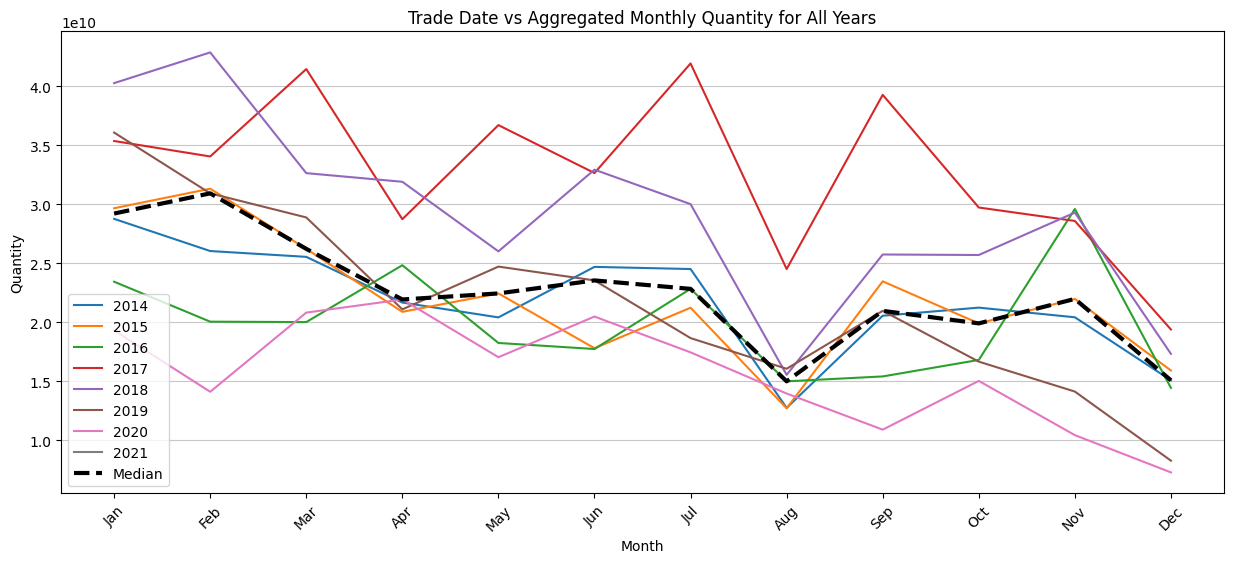

In [78]:
# Assuming df is already defined and contains 'year_month' and 'quantity'
monthly_trades_df = df.sort_values(by='year_month', ascending=False).groupby("year_month")["quantity"].sum().reset_index()

monthly_trades_df["year"] = pd.to_datetime(monthly_trades_df["year_month"]).dt.year
monthly_trades_df["month"] = pd.to_datetime(monthly_trades_df["year_month"]).dt.strftime('%b')

# Get unique years
unique_years = monthly_trades_df["year"].unique()

# Define a more distinct color palette
colors = sns.color_palette("tab10", len(unique_years))

# Create a single plot
plt.figure(figsize=(15, 6))

# Loop through each year and plot on the same figure
for i, year in enumerate(unique_years):
    yearly_data = monthly_trades_df[monthly_trades_df["year"] == year]
    plt.plot(yearly_data["month"], yearly_data["quantity"], color=colors[i], label=f"{year}")

# Compute the median quantity for each month across all years
median_monthly = monthly_trades_df.groupby("month")["quantity"].median().reindex(
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)  # Ensure correct order

# Plot median line in black
plt.plot(median_monthly.index, median_monthly.values, color="black", linestyle="--", linewidth=3, label="Median")

# Final plot styling
plt.grid(True, axis='y', linestyle='-', alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Trade Date vs Aggregated Monthly Quantity for All Years")
plt.xticks(rotation=45)
plt.legend(loc='lower left')
plt.show()


In [80]:
df["month"] = pd.to_datetime(df["year_month"]).dt.strftime('%b')

aug_df = df[df["month"] == "Aug"]["quantity"]
not_aug_df = df[df["month"] != "Aug"]["quantity"]

# Perform One-Sided Mann-Whitney U Test (A < B)
u_stat, p_value = stats.mannwhitneyu(aug_df, not_aug_df, alternative='less')

# Print Results
print(f"Mann-Whitney U Statistic: {u_stat}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: August quantity is significantly smaller than other months.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Mann-Whitney U Statistic: 1687786879.5
P-Value: 3.6420320183617634e-09
Reject the null hypothesis: August quantity is significantly smaller than other months.


# Holidays

In [ ]:
holidays_list = [
    "2023-12-25", # Christmas
    "2023-01-01", # New Year's Day
    # Chinese New Years:
    "2014-01-31", 
    "2015-02-19",
    "2016-02-08",
    "2017-01-28",
    "2018-02-16",
    "2019-02-05",
    "2020-01-25",
    "2021-02-12",
]

## Chinese New Years

In [82]:
# List of Chinese New Year dates
lst_of_chinese_new_years_dates = [
    "2014-01-31", "2015-02-19", "2016-02-08", "2017-01-28",
    "2018-02-16", "2019-02-05", "2020-01-25", "2021-02-12"
]

# Convert list into a dictionary for lookup
cny_dict = {pd.Timestamp(date).year: pd.Timestamp(date) for date in lst_of_chinese_new_years_dates}
cny_dict

{2014: Timestamp('2014-01-31 00:00:00'),
 2015: Timestamp('2015-02-19 00:00:00'),
 2016: Timestamp('2016-02-08 00:00:00'),
 2017: Timestamp('2017-01-28 00:00:00'),
 2018: Timestamp('2018-02-16 00:00:00'),
 2019: Timestamp('2019-02-05 00:00:00'),
 2020: Timestamp('2020-01-25 00:00:00'),
 2021: Timestamp('2021-02-12 00:00:00')}

C:\Users\yoavs\AppData\Local\Temp\ipykernel_12920\698900364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_df["trade_date"] = pd.to_datetime(trade_df["trade_date"])
C:\Users\yoavs\AppData\Local\Temp\ipykernel_12920\698900364.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_df["year"] = trade_df["trade_date"].dt.year


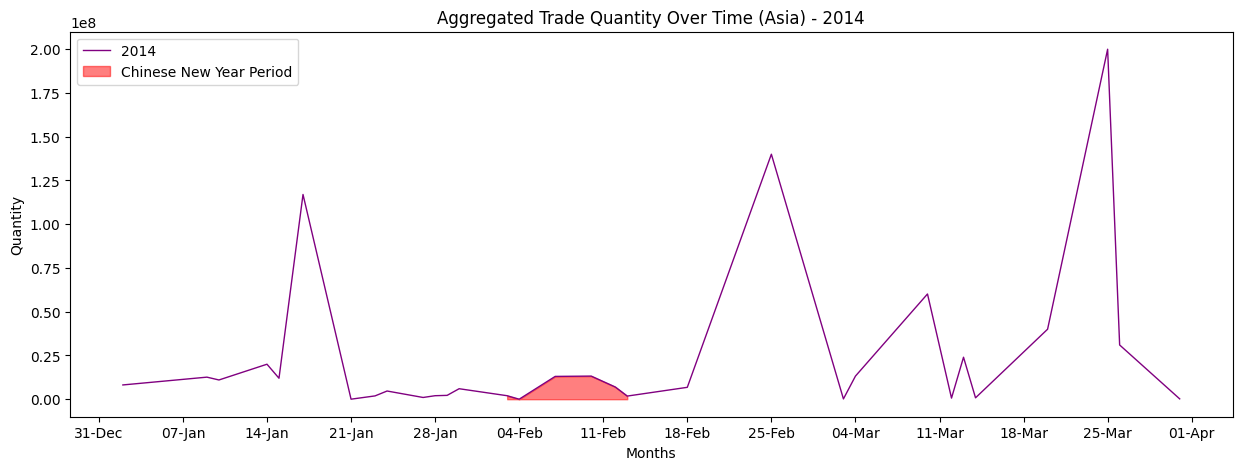

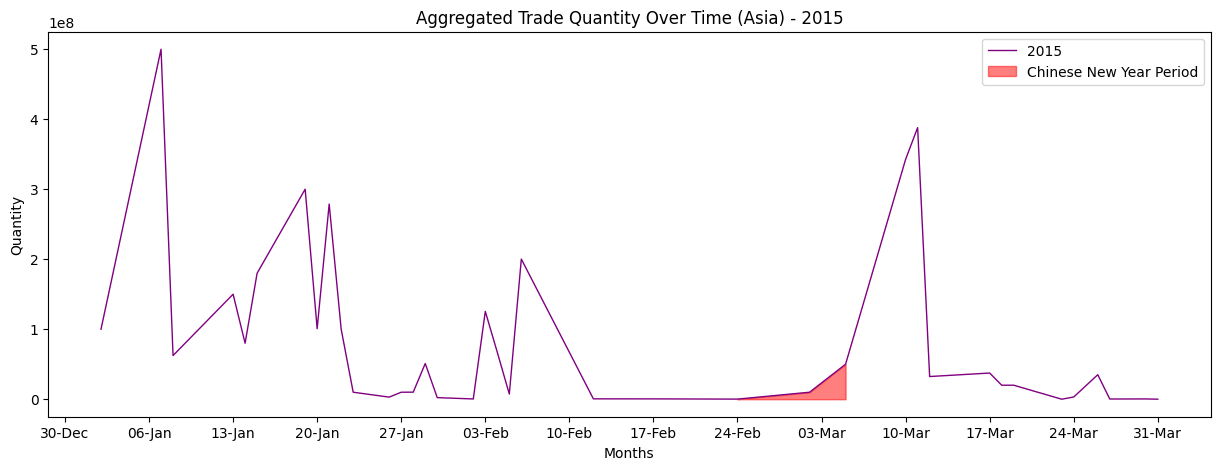

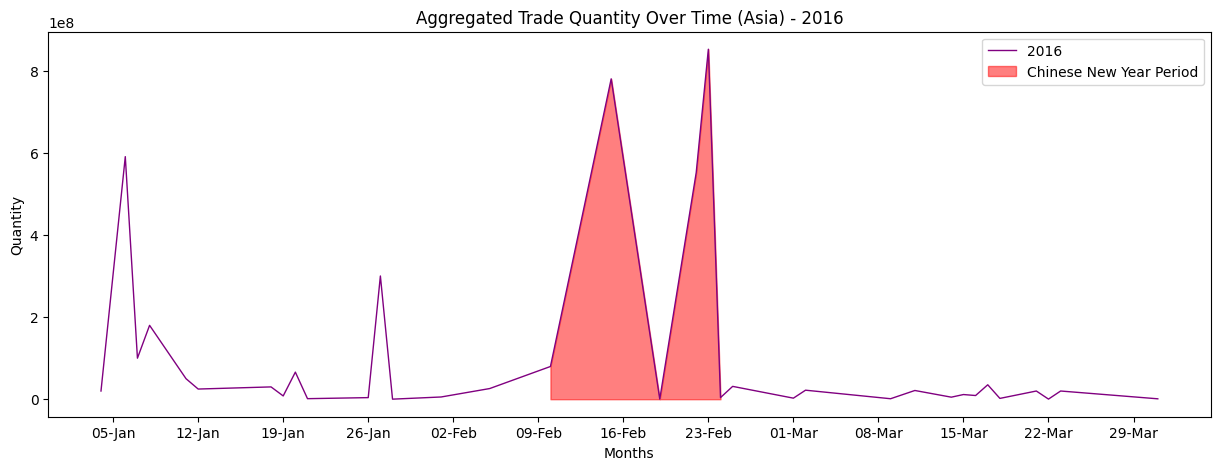

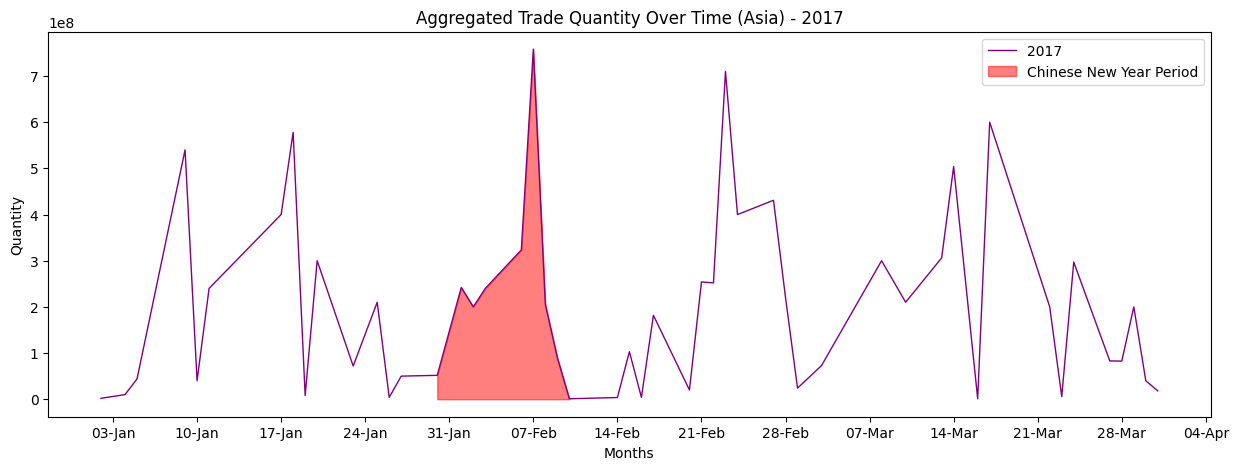

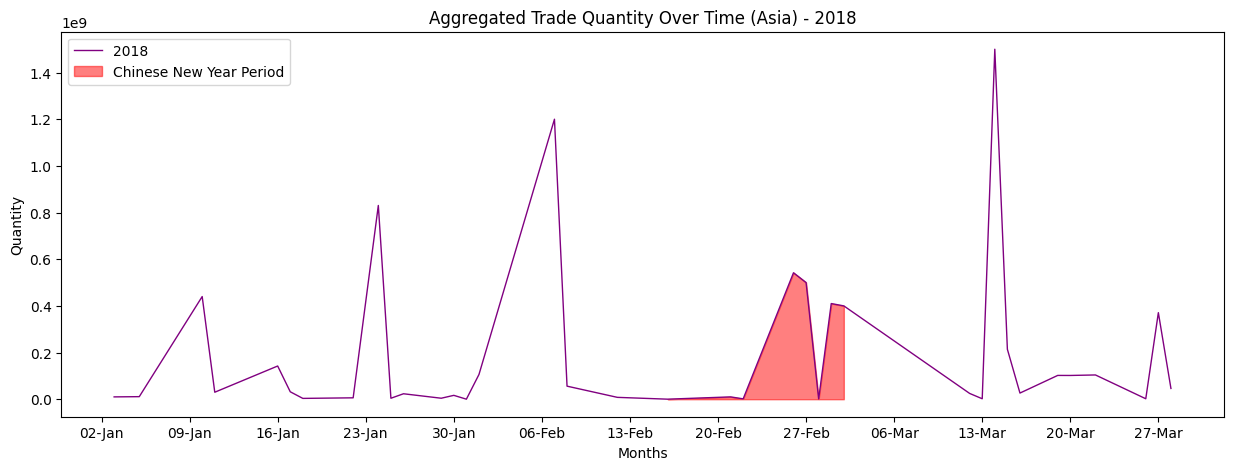

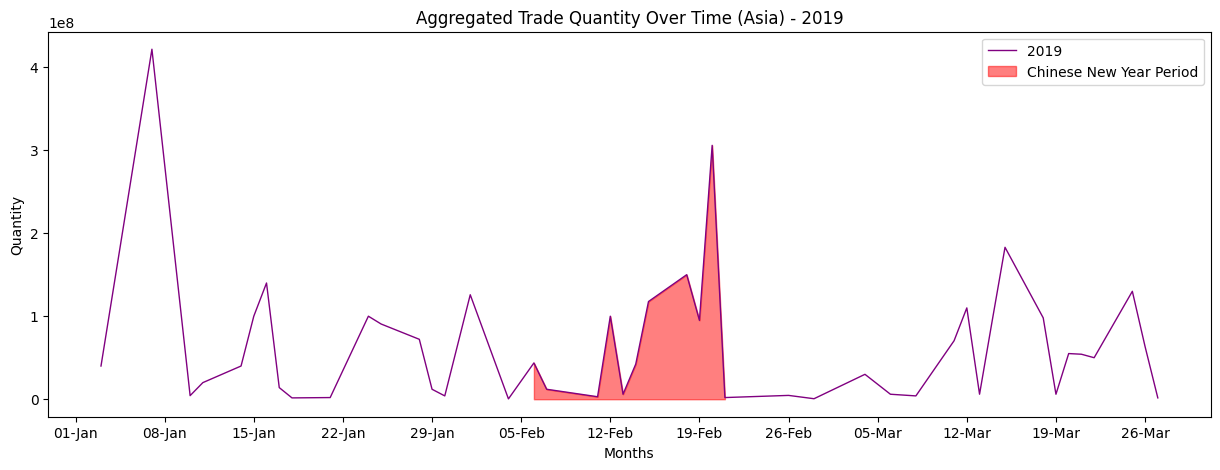

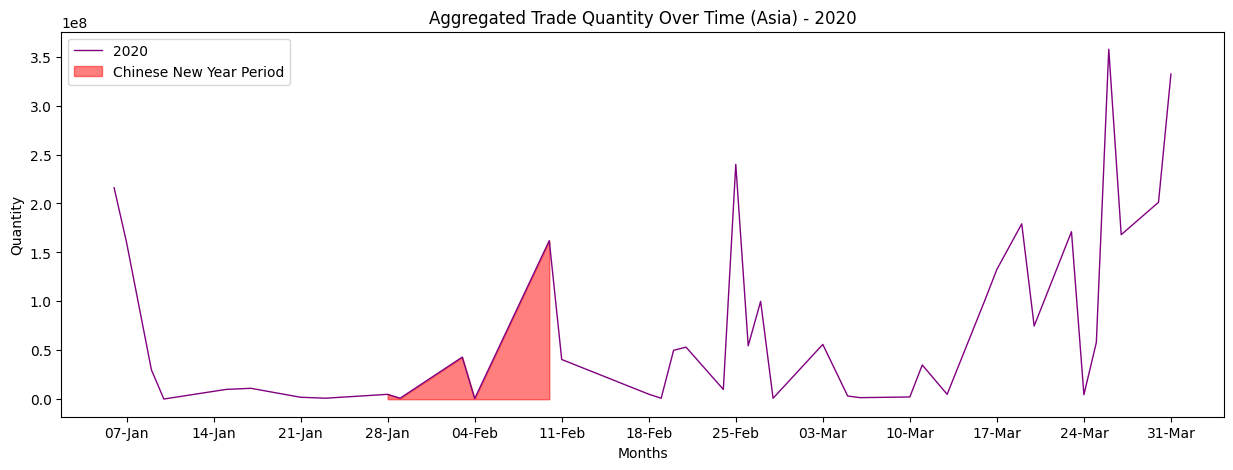

In [85]:
# Filter only Asian region
trade_df = df[(df["region"] == "Asia") & (df["quarter"] == "Q1")]

# Convert trade_date to datetime
trade_df["trade_date"] = pd.to_datetime(trade_df["trade_date"])
trade_df["year"] = trade_df["trade_date"].dt.year

# Get unique years
unique_years = sorted(trade_df["year"].unique())[:-1]

# Loop through each year and plot separately
for year in unique_years:
    if year not in cny_dict:  # Skip if the year is not in the CNY list
        continue
    
    yearly_data = trade_df[trade_df["year"] == year].sort_values(by='trade_date')
    yearly_grouped = yearly_data.groupby("trade_date")["quantity"].sum().reset_index()

    plt.figure(figsize=(15, 5))
    
    # Plot original time series
    plt.plot(yearly_grouped["trade_date"], yearly_grouped["quantity"], label=f"{year}", color="purple", linewidth=1)
    
    # Define start & end dates for Chinese New Year
    cny_start = cny_dict[year]
    
    cny_end = cny_start + pd.Timedelta(days=16)  # 16 days after CNY
    
    # Filter data within the highlight range
    mask = (yearly_grouped["trade_date"] >= cny_start) & (yearly_grouped["trade_date"] <= cny_end)
    
    # Fill area under the curve for the selected date range
    plt.fill_between(
        yearly_grouped["trade_date"][mask], 
        yearly_grouped["quantity"][mask], 
        color="red", 
        alpha=0.5, 
        label="Chinese New Year Period"
    )

    # Set labels
    plt.xlabel("Months")
    plt.ylabel("Quantity")
    plt.title(f"Aggregated Trade Quantity Over Time (Asia) - {year}")

    # Format x-axis labels as full date (day-month)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Format as '01-Jan'
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Place a tick every week
    
    plt.legend()
    plt.show()


In [86]:
# For each year, make df for trade quantities before, during, and after Chinese New Year
trade_df = df[(df["region"] == "Asia") & (df["quarter"] == "Q1")]

# Convert trade_date to datetime
trade_df["trade_date"] = pd.to_datetime(trade_df["trade_date"])
trade_df["year"] = trade_df["trade_date"].dt.year

# Get unique years
unique_years = sorted(trade_df["year"].unique())[:-1]

avg_p_values = []

for year in unique_years:
    # Define start & end dates for Chinese New Year
    # Dates OF CNY
    cny_start = cny_dict[year]
    cny_end = cny_start + pd.Timedelta(days=16)  # 16 days after CNY

    # Dates after CNY
    cny_16_after = cny_end + pd.Timedelta(days=16)

    # Dates before CNY
    cny_16_before = cny_start - pd.Timedelta(days=16)

    pre_cny_df = trade_df[(trade_df["trade_date"] > cny_16_before) & (trade_df["trade_date"] < cny_start)]
    post_cny_df = trade_df[(trade_df["trade_date"] > cny_end) & (trade_df["trade_date"] < cny_16_after)]
    cny_period = trade_df[(trade_df["trade_date"] > cny_start) & (trade_df["trade_date"] < cny_end)]

    stat, p_value = stats.kruskal(pre_cny_df["quantity"], cny_period["quantity"], post_cny_df["quantity"])

    avg_p_values.append(p_value)

    # Print results
    print(f"P-value for {year}: {p_value:.50f}")
    if p_value < 0.1:
        print("There is a significant difference in trade quantities.")

# Calculate the average p-value
print(sum(avg_p_values) / len(avg_p_values))

P-value for 2014: 0.00309821590570708450124159938354750920552760362625
There is a significant difference in trade quantities.
P-value for 2015: 0.23510921516783922502469295068294741213321685791016
P-value for 2016: 0.00935763155134687087122191684329663985408842563629
There is a significant difference in trade quantities.
P-value for 2017: 0.88375546056795073468492773827165365219116210937500
P-value for 2018: 0.29078120547362557024584361897723283618688583374023
P-value for 2019: 0.85541531589071662100565163200371898710727691650391
P-value for 2020: 0.06298115014116799359467080421381979249417781829834
There is a significant difference in trade quantities.
0.33435688495690774


C:\Users\yoavs\AppData\Local\Temp\ipykernel_12920\3258168945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_df["trade_date"] = pd.to_datetime(trade_df["trade_date"])
C:\Users\yoavs\AppData\Local\Temp\ipykernel_12920\3258168945.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_df["year"] = trade_df["trade_date"].dt.year


## Christmas

In [87]:
df["month"] = pd.to_datetime(df["year_month"]).dt.strftime('%b')
xmas_general = df[df["month"].isin(["Jan", "Feb", "Nov", "Dec"])]

In [88]:
xmas_2014 = df[(df["trade_date"] < "2015-01-31") & (df["trade_date"] > "2014-12-01")]
xmas_2014 = xmas_2014.sort_values(by='trade_date', ascending=False).groupby("trade_date")["quantity"].sum().reset_index()
xmas_2014['trade_date'] = xmas_2014['trade_date'].apply(lambda x: x.replace(year=1990) if x.year == 2014 
                                          else x.replace(year=1991) if x.year == 2015 
                                          else x)

xmas_2015 = df[(df["trade_date"] < "2016-01-31") & (df["trade_date"] > "2015-12-01")]
xmas_2015 = xmas_2015.sort_values(by='trade_date', ascending=False).groupby("trade_date")["quantity"].sum().reset_index()
xmas_2015['trade_date'] = xmas_2015['trade_date'].apply(lambda x: x.replace(year=1990) if x.year == 2015
                                          else x.replace(year=1991) if x.year == 2016 
                                          else x)


xmas_2016 = df[(df["trade_date"] < "2017-01-31") & (df["trade_date"] > "2016-12-01")]
xmas_2016 = xmas_2016.sort_values(by='trade_date', ascending=False).groupby("trade_date")["quantity"].sum().reset_index()
xmas_2016['trade_date'] = xmas_2016['trade_date'].apply(lambda x: x.replace(year=1990) if x.year == 2016
                                          else x.replace(year=1991) if x.year == 2017 
                                          else x)

xmas_2017 = df[(df["trade_date"] < "2018-01-31") & (df["trade_date"] > "2017-12-01")]
xmas_2017 = xmas_2017.sort_values(by='trade_date', ascending=False).groupby("trade_date")["quantity"].sum().reset_index()
xmas_2017['trade_date'] = xmas_2017['trade_date'].apply(lambda x: x.replace(year=1990) if x.year == 2017
                                          else x.replace(year=1991) if x.year == 2018 
                                          else x)

xmas_2018 = df[(df["trade_date"] < "2019-01-31") & (df["trade_date"] > "2018-12-01")]
xmas_2018 = xmas_2018.sort_values(by='trade_date', ascending=False).groupby("trade_date")["quantity"].sum().reset_index()
xmas_2018['trade_date'] = xmas_2018['trade_date'].apply(lambda x: x.replace(year=1990) if x.year == 2018
                                          else x.replace(year=1991) if x.year == 2019 
                                          else x)


xmas_2019 = df[(df["trade_date"] < "2020-01-31") & (df["trade_date"] > "2019-12-01")]
xmas_2019 = xmas_2019.sort_values(by='trade_date', ascending=False).groupby("trade_date")["quantity"].sum().reset_index()
xmas_2019['trade_date'] = xmas_2019['trade_date'].apply(lambda x: x.replace(year=1990) if x.year == 2019
                                          else x.replace(year=1991) if x.year == 2020 
                                          else x)

xmas_2020 = df[(df["trade_date"] < "2021-01-31") & (df["trade_date"] > "2020-12-01")]
xmas_2020 = xmas_2020.sort_values(by='trade_date', ascending=False).groupby("trade_date")["quantity"].sum().reset_index()
xmas_2020['trade_date'] = xmas_2020['trade_date'].apply(lambda x: x.replace(year=1990) if x.year == 2020
                                          else x.replace(year=1991) if x.year == 2021 
                                          else x)



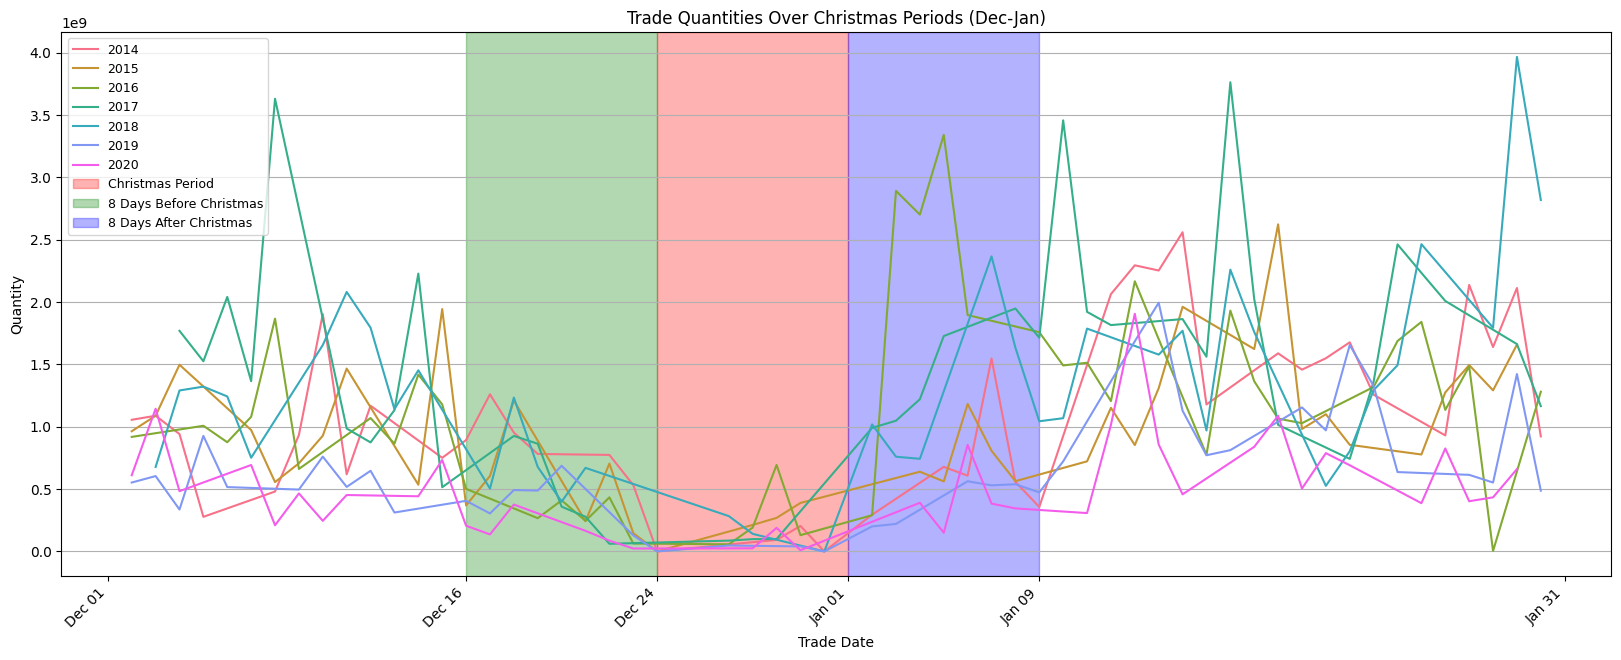

In [89]:
# Define datasets in a list
xmas_years = [
    xmas_2014, xmas_2015, xmas_2016, xmas_2017, xmas_2018, xmas_2019, xmas_2020
]
labels = [
    "2014", "2015", "2016", 
    "2017", "2018", "2019", "2020"
]

# Use a color palette from seaborn (e.g., "tab10", "husl", "Set1", "coolwarm")
colors = sns.color_palette("husl", len(xmas_years))  # Automatically generate colors

# Plot the first dataset
plot = xmas_years[0].plot(
    kind="line", color=colors[0], x="trade_date", y="quantity", 
    linestyle="-", figsize=(20, 8), label=labels[0]
)

# Plot the remaining datasets
for i in range(1, len(xmas_years)):
    xmas_years[i].plot(
        kind="line", color=colors[i], x="trade_date", y="quantity", 
        linestyle="-", ax=plot, label=labels[i]
    )

# Set x-axis ticks
xmas_start = pd.Timestamp("1990-12-24")
xmas_end = pd.Timestamp("1991-01-01")

xmas_before_8_days = xmas_start - pd.Timedelta(days=8)
xmas_after_8_days = xmas_end + pd.Timedelta(days=8)

dec_1 = pd.Timestamp("1990-12-01")
jan_31 = pd.Timestamp("1991-01-31")

x_ticks = [dec_1, xmas_start, jan_31, xmas_end, xmas_before_8_days, xmas_after_8_days]
x_labels = [date.strftime("%b %d") for date in x_ticks]

plt.xticks(x_ticks, x_labels, rotation=45)

# Highlight Christmas period (December 24 - January 1)
plt.axvspan(xmas_start, xmas_end, color='red', alpha=0.3, label="Christmas Period")
plt.axvspan(xmas_before_8_days, xmas_start, color='green', alpha=0.3, label="8 Days Before Christmas")
plt.axvspan(xmas_end, xmas_after_8_days, color='blue', alpha=0.3, label="8 Days After Christmas")

plt.legend(loc='upper left', prop={'size': 9})
plt.title("Trade Quantities Over Christmas Periods (Dec-Jan)")
plt.xlabel("Trade Date")
plt.ylabel("Quantity")

plt.grid(True, axis="y")
plt.show()


C:\Users\yoavs\AppData\Local\Temp\ipykernel_12920\1846680110.py:33: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(median_xmas["trade_date"], median_xmas["quantity"], color="black", linestyle="--", label="Median Quantity", linewidth=3)


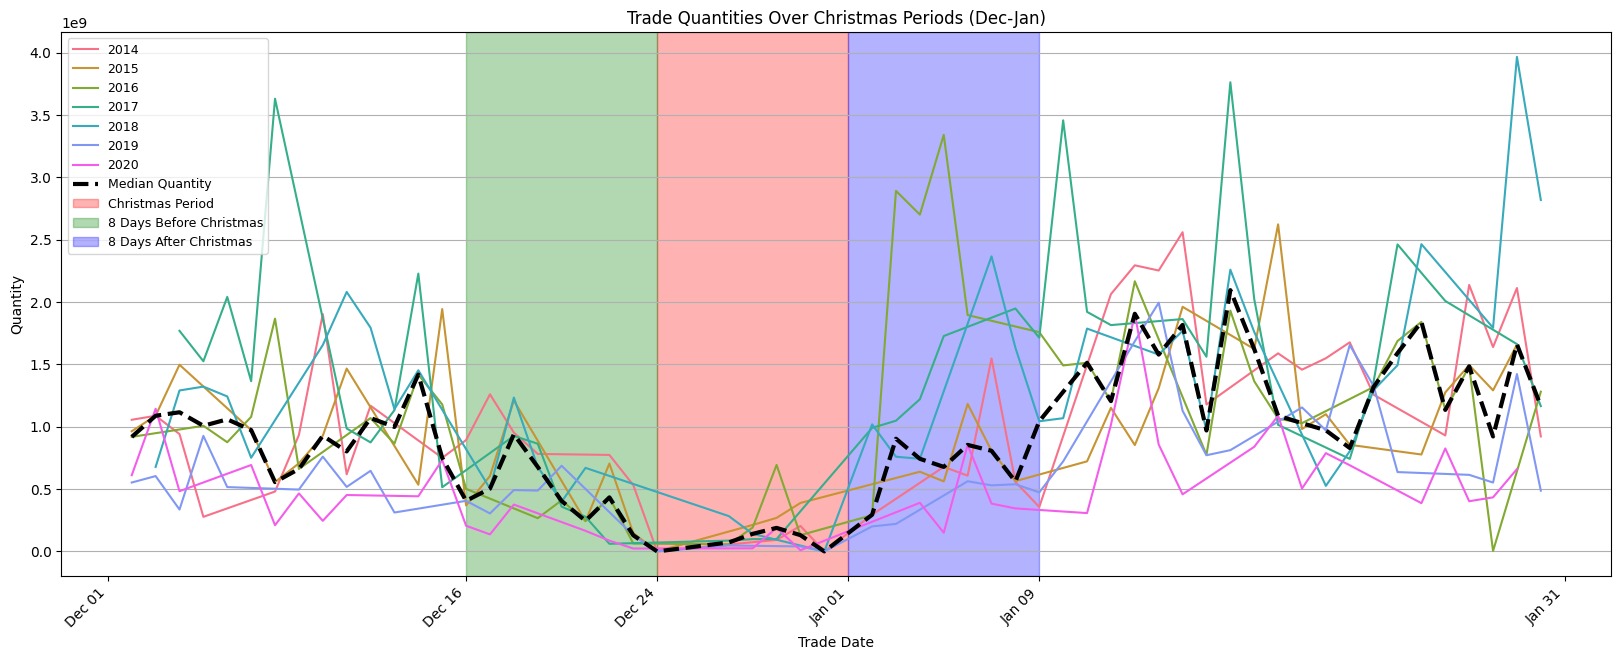

In [90]:
# Define datasets in a list (already done in your code)
xmas_years = [
    xmas_2014, xmas_2015, xmas_2016, xmas_2017, xmas_2018, xmas_2019, xmas_2020
]
labels = [
    "2014", "2015", "2016", 
    "2017", "2018", "2019", "2020"
]

# Use a color palette from seaborn
colors = sns.color_palette("husl", len(xmas_years))

# Combine all years into a single DataFrame for median calculation
combined_xmas = pd.concat(xmas_years)

# Compute median quantity for each trade_date
median_xmas = combined_xmas.groupby("trade_date")["quantity"].median().reset_index()

# Plot the first dataset
plot = xmas_years[0].plot(
    kind="line", color=colors[0], x="trade_date", y="quantity", 
    linestyle="-", figsize=(20, 8), label=labels[0]
)

# Plot the remaining datasets
for i in range(1, len(xmas_years)):
    xmas_years[i].plot(
        kind="line", color=colors[i], x="trade_date", y="quantity", 
        linestyle="-", ax=plot, label=labels[i]
    )

# Plot the median line
plt.plot(median_xmas["trade_date"], median_xmas["quantity"], color="black", linestyle="--", label="Median Quantity", linewidth=3)

# Set x-axis ticks
xmas_start = pd.Timestamp("1990-12-24")
xmas_end = pd.Timestamp("1991-01-01")

xmas_before_8_days = xmas_start - pd.Timedelta(days=8)
xmas_after_8_days = xmas_end + pd.Timedelta(days=8)

dec_1 = pd.Timestamp("1990-12-01")
jan_31 = pd.Timestamp("1991-01-31")

x_ticks = [dec_1, xmas_start, jan_31, xmas_end, xmas_before_8_days, xmas_after_8_days]
x_labels = [date.strftime("%b %d") for date in x_ticks]

plt.xticks(x_ticks, x_labels, rotation=45)

# Highlight Christmas period (December 24 - January 1)
plt.axvspan(xmas_start, xmas_end, color='red', alpha=0.3, label="Christmas Period")
plt.axvspan(xmas_before_8_days, xmas_start, color='green', alpha=0.3, label="8 Days Before Christmas")
plt.axvspan(xmas_end, xmas_after_8_days, color='blue', alpha=0.3, label="8 Days After Christmas")

plt.legend(loc='upper left', prop={'size': 9})
plt.title("Trade Quantities Over Christmas Periods (Dec-Jan)")
plt.xlabel("Trade Date")
plt.ylabel("Quantity")

plt.grid(True, axis="y")
plt.show()


In [93]:
entire_xmas_peripod =  pd.concat(xmas_years, axis=0, ignore_index=True)

xmas_period = entire_xmas_peripod[(entire_xmas_peripod["trade_date"] > xmas_start) & (entire_xmas_peripod["trade_date"] < xmas_end)]["quantity"]
xmas_before = entire_xmas_peripod[(entire_xmas_peripod["trade_date"] > xmas_before_8_days) & (entire_xmas_peripod["trade_date"] < xmas_start)]["quantity"]
xmas_after = entire_xmas_peripod[(entire_xmas_peripod["trade_date"] > xmas_start) & (entire_xmas_peripod["trade_date"] < xmas_after_8_days)]["quantity"]

# Perform the Kruskal-Wallis test
stat, p_value = stats.kruskal(xmas_period, xmas_before, xmas_after)

# Print results
print(f"Kruskal-Wallis H-statistic: {stat:.4f}")
print(f"P-value: {p_value:.50f}")

Kruskal-Wallis H-statistic: 19.0102
P-value: 0.00007447053977794117240237431465388340257050003856


p-value < 0.05, we reject the null hypothesis → At least one quarter is significantly different.

In [94]:
# Perform Dunn’s test
posthoc_results = sp.posthoc_dunn([xmas_before, xmas_period, xmas_after], p_adjust="bonferroni")

# Set decimal formatting (up to 6 decimal places)
formatted_results = posthoc_results.applymap(lambda x: f"{x:.6f}")

# Display formatted results
print(formatted_results)

          1         2         3
1  1.000000  0.000343  1.000000
2  0.000343  1.000000  0.000133
3  1.000000  0.000133  1.000000


C:\Users\yoavs\AppData\Local\Temp\ipykernel_12920\141906286.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_results = posthoc_results.applymap(lambda x: f"{x:.6f}")
